<a href="https://colab.research.google.com/github/003084-K/cardsort/blob/test/WCST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import random
import itertools


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Convention for mock data:

Row 1 = shape  
Row 2 = number  
Row 3 = color

In [0]:
# Make 1-hot encoded numpy array for each card
card_list = np.zeros((64,3,4))

In [0]:
card_list.shape

(64, 3, 4)

In [0]:
for i, (shape, number, color) in enumerate(itertools.product(range(0,4), range(0,4), range(0,4))):
    card_list[i][0][shape] = 1
    card_list[i][1][number] = 1
    card_list[i][2][color] = 1

In [0]:
card_list

array([[[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.]],

       [[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]],

       [[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]],

       [[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.]],

       [[1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.]],

       [[1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[1., 0., 0., 0.],
        [0., 0

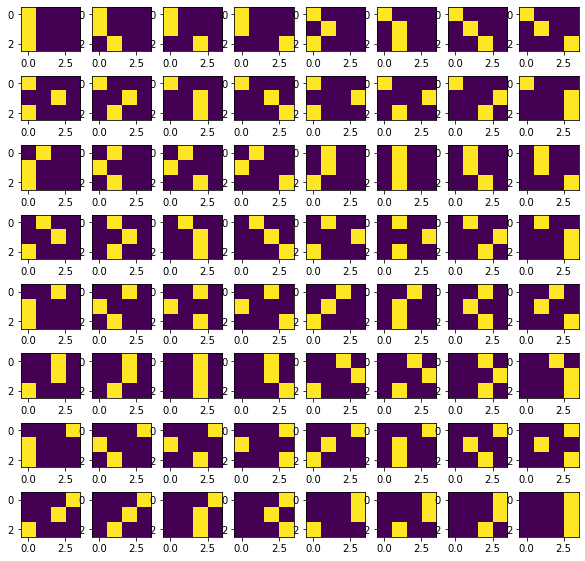

In [0]:
f, ax = plt.subplots(nrows=8, ncols=8, figsize=[10,10])
for i in range(0, card_list.shape[0]):
    ax.flatten()[i].imshow(card_list[i])
# plt.tight_layout()
plt.show() 

In [0]:
# goal: be able to randomly sample from all possible sets of cards as quickly as possible
# solution: pre-determine all possible combinations of cards given each test card and store for future stochastic sampling
# we can randomly shuffle the order of cards in a given set when generating batches

In [0]:
sets = []

# for each probe card, determine all possible sets
for p_card in card_list:
  # first determine all cards matching in shape (but not other features)
  for s_card in card_list:
    if (np.sum((s_card==p_card),axis=1)==(4,2,2)).all():
      # for each card that matches in number (but not other features) that doesn't share features with shapecard
      for n_card in card_list:
        if (np.sum((n_card==p_card),axis=1)==(2,4,2)).all() and (np.sum((n_card==s_card),axis=1)==(2,2,2)).all():
          # for each card that matches in color (but not other features) that doesn't share features with shapecard or numcard
          for c_card in card_list:
            if (np.sum((c_card==p_card),axis=1)==(2,2,4)).all() and (np.sum((c_card==s_card),axis=1)==(2,2,2)).all() and (np.sum((c_card==n_card),axis=1)==(2,2,2)).all():
            # for each card that matches in no features that doesn't share features with shapecard or numcard or colorcard
              for no_card in card_list:
                if (np.sum((no_card==p_card),axis=1)==(2,2,2)).all() and (np.sum((no_card==s_card),axis=1)==(2,2,2)).all() and (np.sum((no_card==n_card),axis=1)==(2,2,2)).all() and (np.sum((no_card==c_card),axis=1)==(2,2,2)).all():
                # save whole set
                  sets.append((s_card,n_card,c_card,no_card,p_card))

sets = np.array(sets)

In [0]:
sets.shape

(13824, 5, 3, 4)